In [23]:
import pandas as pd
import pyodbc 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sqlalchemy as sal
from sqlalchemy import create_engine

In [24]:
#Connect to Data Structure for sqlalchemy is: "mssql+pyodbc://OpR-Marc-DB2:1433/RPC1?driver=ODBC+Driver+17+for+SQL+Server" --change RPC1 for other volumes

RPC1 = sal.create_engine("mssql+pyodbc://OpR-Marc-DB2:1433/RPC1?driver=ODBC+Driver+17+for+SQL+Server")
connection = RPC1.connect()

RC1 = sal.create_engine("mssql+pyodbc://OpR-Marc-DB2:1433/RC1?driver=ODBC+Driver+17+for+SQL+Server")
connection = RC1.connect()


In [25]:
RPC1RibbonInputDF = pd.DataFrame()
RC1RibbonInputDF = pd.DataFrame()

In [18]:
RC1Aiis= ["514", "3679", "2610", "410"]
RPC1Aiis = ["192", "262", "265", "1685", "2710"]

In [26]:
#Pull Data from RPC1
for x in RPC1Aiis: 
    query = "SET NOCOUNT ON; EXEC RLPfeiffer.RibbonInputs @TargetCell= " + "'" + x + "'"
    RI = pd.read_sql(query, con = RPC1)
    RPC1RibbonInputDF = RPC1RibbonInputDF.append(RI)

RPC1RibbonInputDF


,SourceParent,SourceParentLabel,SourceStructureType,SourceID,TargetID,TargetParent,TargetParentLabel,Notes
0,1,CBa,73,24,42960,192,Aii GAC,\n*****BEGIN MERGE FROM 26243*****\nPossible b...
1,1,CBa,73,24,42961,192,Aii GAC,\n*****BEGIN MERGE FROM 26243*****\nPossible b...
2,1,CBa,73,26244,32501,192,Aii GAC,\n*****BEGIN MERGE FROM 26243*****\nPossible b...
3,135,CBa,73,290,200,192,Aii GAC,Gap junction with 192 @ X: 11327.0\tY: 24611.4...
4,135,CBa,73,1061,45378,192,Aii GAC,Gap junction with 192 @ X: 11327.0\tY: 24611.4...
...,...,...,...,...,...,...,...,...
62,47609,CBa,73,47612,47604,2710,Aii GAC,Soma is largely off volume
63,47668,CBa,73,47669,45701,2710,Aii GAC,
64,47672,CBa,73,47673,45720,2710,Aii GAC,Probably a CBa due to how shallow the branch is.
65,47680,BC,73,47681,37958,2710,Aii GAC,Lose it in the (-) direction over the death zo...


In [33]:
#Fix any odd names in RPC1 DF
RPC1RibbonInputDF.replace('CBa?', "CBa", inplace=True)

In [131]:
RPC1RibbonInputDF.SourceParentLabel.value_counts()

RodBC    245
CBa       85
CBb       25
BC         2
Name: SourceParentLabel, dtype: int64

In [34]:
RPC1RibbonInputDF = RPC1RibbonInputDF.reset_index(drop = True)

In [36]:
#Pull data from RC1
for x in RC1Aiis: 
    query = "SET NOCOUNT ON; EXEC RLPfeiffer.RibbonInputs @TargetCell= " + "'" + x + "'"
    RI = pd.read_sql(query, con = RC1)
    RC1RibbonInputDF = RC1RibbonInputDF.append(RI)

RC1RibbonInputDF

,SourceParent,SourceParentLabel,SourceStructureType,SourceID,TargetID,TargetParent,TargetParentLabel,Notes
0,519,RodBC,73,1376,160107,514,GAC Aii,tracing cell 9234
1,518,RodBC,73,3457,166034,514,GAC Aii,ROD BC
2,518,RodBC,73,3471,37188,514,GAC Aii,ROD BC
3,518,RodBC,73,3487,166009,514,GAC Aii,ROD BC
4,518,RodBC,73,3505,3573,514,GAC Aii,ROD BC
...,...,...,...,...,...,...,...,...
90,6163,RodBC,73,167568,17760,410,GAC Aii,
91,16446,RodBC,73,167862,167861,410,GAC Aii,
92,168480,None,73,168481,160351,410,GAC Aii,
93,17533,RodBC,73,168483,166555,410,GAC Aii,


In [46]:
#Find all Labels
RC1RibbonInputDF.SourceParentLabel.value_counts()

RodBC    338
CBa       52
CBb        7
Name: SourceParentLabel, dtype: int64

In [45]:
#Fix any odd names in RC1 DF or simplify
RC1RibbonInputDF.replace('CBbwf', "CBb", inplace=True)

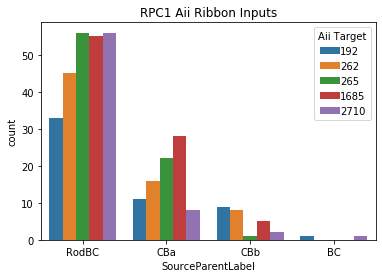

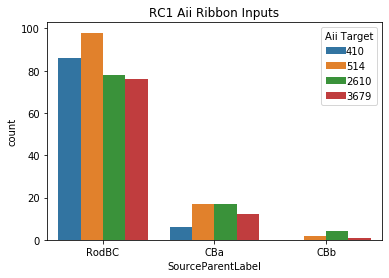

In [49]:
#Make comparison bargraphs
f, ax = plt.subplots()
sns.countplot(data = RPC1RibbonInputDF, x ='SourceParentLabel', order=RPC1RibbonInputDF.SourceParentLabel.value_counts().index, hue="TargetParent")

handles, labels = ax.get_legend_handles_labels()
ax.set_title('RPC1 Aii Ribbon Inputs')
ax.legend( title="Aii Target",
          handletextpad=0, columnspacing=1,
          loc="upper right",  frameon=True)

g, ax2 = plt.subplots()
sns.countplot(data = RC1RibbonInputDF, x ='SourceParentLabel', order=RC1RibbonInputDF.SourceParentLabel.value_counts().index, hue="TargetParent")

handles, labels = ax.get_legend_handles_labels()
ax2.set_title('RC1 Aii Ribbon Inputs')
ax2.legend( title="Aii Target",
          handletextpad=0, columnspacing=1,
          loc="upper right",  frameon=True)

In [76]:
#create simplified count-based DFs
SimpRPC1RibbonInputDF = RPC1RibbonInputDF.groupby("TargetParent")["SourceParentLabel"].value_counts().to_frame(name = 'counts').reset_index()
SimpRC1RibbonInputDF = RC1RibbonInputDF.groupby("TargetParent")["SourceParentLabel"].value_counts().to_frame(name = 'counts').reset_index()


In [132]:
SimpRPC1RibbonInputDF

,TargetParent,SourceParentLabel,counts,TotalInput,PercentofInput,Volume
0,192,RodBC,33,54,61.111111,RPC1
1,192,CBa,11,54,20.370370,RPC1
2,192,CBb,9,54,16.666667,RPC1
3,192,BC,1,54,1.851852,RPC1
4,262,RodBC,45,69,65.217391,RPC1
5,262,CBa,16,69,23.188406,RPC1
6,262,CBb,8,69,11.594203,RPC1
7,265,RodBC,56,79,70.886076,RPC1
8,265,CBa,22,79,27.848101,RPC1
9,265,CBb,1,79,1.265823,RPC1


In [ ]:
df = SimpRPC1RibbonInputDF
df["TotalInput"] = df.groupby('TargetParent')["counts"].transform('sum')
df["PercentofInput"] = df["counts"] / df["TotalInput"]*100
df["Volume"]= 'RPC1'

df

In [ ]:
df = SimpRC1RibbonInputDF
df["TotalInput"] = df.groupby('TargetParent')["counts"].transform('sum')
df["PercentofInput"] = df["counts"] / df["TotalInput"]*100
df["Volume"]= 'RC1'

df

In [ ]:
frames = [SimpRC1RibbonInputDF, SimpRPC1RibbonInputDF]
CombinedRI = pd.concat(frames).reset_index()

CombinedRI

In [107]:
CombinedRI = CombinedRI.rename({'counts':'TotalRibbonCount'}, axis = 'columns')

In [133]:
CombinedRI

,index,TargetParent,SourceParentLabel,TotalRibbonCount,TotalInput,PercentofInput,Volume
0,0,410,RodBC,86,92,93.478261,RC1
1,1,410,CBa,6,92,6.521739,RC1
2,2,514,RodBC,98,117,83.760684,RC1
3,3,514,CBa,17,117,14.529915,RC1
4,4,514,CBb,2,117,1.709402,RC1
5,5,2610,RodBC,78,99,78.787879,RC1
6,6,2610,CBa,17,99,17.171717,RC1
7,7,2610,CBb,4,99,4.040404,RC1
8,8,3679,RodBC,76,89,85.393258,RC1
9,9,3679,CBa,12,89,13.483146,RC1


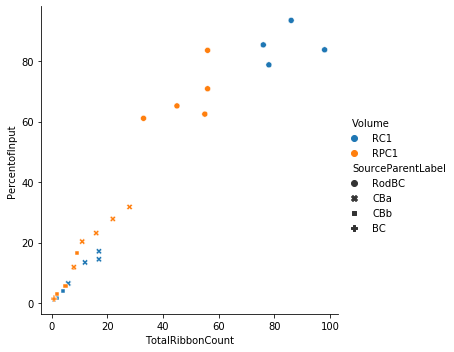

In [134]:
sns.relplot(x="TotalRibbonCount", y="PercentofInput", hue="Volume", style="SourceParentLabel", data=CombinedRI);

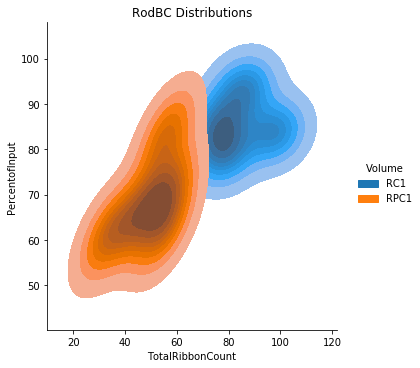

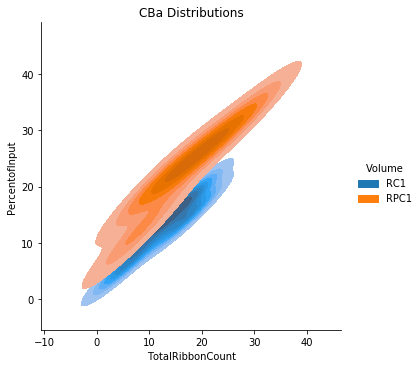

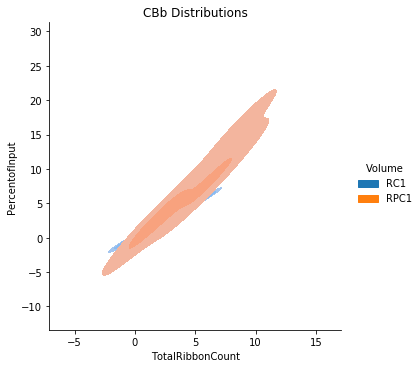

In [130]:

RPC1 = CombinedRI.loc[CombinedRI.Volume=='RPC1']
RC1 = CombinedRI.loc[CombinedRI.Volume=='RC1']
RodBC = CombinedRI.loc[CombinedRI.SourceParentLabel=='RodBC']
CBa = CombinedRI.loc[CombinedRI.SourceParentLabel=='CBa']
CBb = CombinedRI.loc[CombinedRI.SourceParentLabel=='CBb']

sns.displot(CombinedRI, x=RodBC.TotalRibbonCount, y=RodBC.PercentofInput, hue="Volume", kind = "kde", fill = True).set(title = "RodBC Distributions")
sns.displot(CombinedRI, x=CBa.TotalRibbonCount, y=CBa.PercentofInput, hue="Volume", kind = "kde", fill = True).set(title = "CBa Distributions")
sns.displot(CombinedRI, x=CBb.TotalRibbonCount, y=CBb.PercentofInput, hue="Volume", kind = "kde", fill = True).set(title = "CBb Distributions")

